In [1]:
import os
import numpy as np
import netCDF4 as nc4
import shutil
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
doanalysis = 1

ncases=250
#where are we now?
notebookdr=os.getcwd() 
ens_directory='FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin'
vs=range(1,ncases) 
USER='rfisher'

#path to scratch (or where the model is built.)
output_dir='/glade/derecho/scratch/'+USER+'/'

caseroot=ens_directory

In [3]:
if doanalysis ==1: 
    ychoose = 50
    conv = 3600*24*365
    yr='.clm2.h0.'   
    delta=1
    print('ychoose=', ychoose)
    rel=1


ychoose= 50


In [4]:
def make_directory(fileroot):   
    if(os.path.isdir(fileroot)):
        print('dir exists:'+fileroot)
    else:
        os.mkdir(fileroot)
        print('made: '+fileroot)

#### ANALYSIS: Choose variables to read in

In [5]:
vars=['FATES_GPP','FATES_NPP','TLAI','QFLX_EVAP_TOT','FATES_GROWTH_RESP',
      'FATES_MAINT_RESP','FATES_LEAFMAINTAR','FATES_VEGC','FATES_VEGC_ABOVEGROUND','FATES_NPLANT_PF','FATES_TRIMMING','lat','lon','time']

 #### ANALYSIS: Make output figure directory

In [6]:
figpath = (notebookdr+'/'+ 'figs_'+ens_directory+'/')
make_directory(figpath)
pfileroot3= '/glade/work/rfisher/FATES_calibration/FATES_NOCOMP_OAAT/paramfiles/nocomp_oaat_v3_'
pfileroot = '/glade/work/rfisher/FATES_calibration/FATES_NOCOMP_OAAT/paramfiles/nocomp_oaat_v2_'

dir exists:/glade/u/home/rfisher/rosiefork_fates_global_cal/ilamb_scripts/figs_FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin/


####  ANALYSIS: Make a single data structure for the ensemble

In [7]:
def is_odd(number):
    if number % 2 == 1:
        return True
    else:
        return False

In [9]:
print(output_dir,ncases)
caseroot=ens_directory
if doanalysis ==1:
    debug=0
    mins_ds=[]
    maxs_ds=[]
    count=1
    missing=range(0,ncases+1)
    missing=np.multiply(missing,0)
    for i in vs: 
        run=caseroot+str(i)
        if(ychoose<10):
            hstring='.clm2.h0.000'
        elif (ychoose<100):
            hstring='.clm2.h0.00'
        else:
            hstring='.clm2.h0.0' 
        print(i,hstring)
        #os.listdir(output_dir + '/archive')
        ahpath = output_dir + 'archive/' + run + '/lnd/hist/' 
        rhpath = output_dir + run + '/run/' 
        
        tfile = run+hstring+str(ychoose)+'-06.nc'
        if debug == 1 :print('tfile',tfile)
        missing[i]=1
        #if(os.path.isdir(hpath)): ! #there is an archive
        if(os.path.isfile(rhpath+tfile)):  # this years is in the archive. 
            hpath = rhpath
            if debug == 1 :print('file in archive',rhpath)
            missing[i]=0
        else:
            if debug == 1 :print('file not in archive. try rundir',hpath+tfile)                
            hpath = ahpath       
            if(os.path.isdir(hpath)): 
                #print('there is a rundir',hpath+tfile)                
                if(os.path.isfile(hpath+tfile)):
                    if debug == 1 :print('file in  rundir')
                    missing[i]=0
                else:
                    print('no file in rundir',hpath+tfile)
            else:
                print('there is no  rundir',hpath+tfile)
                
        if(missing[i]==0): # the year can be found. 
            rt=hpath+run+yr+str(ychoose)+'*'
            rt=hpath+tfile
            print('rt',rt)
            tmp = xr.open_mfdataset(rt, decode_times=False)  
            allvars=list(xr.open_dataset(hpath+tfile, decode_times=False).variables)
            dropvars=list(set(allvars) - set(vars)) #thanks to Ben for figuring this part out :) 
            tmp=xr.open_mfdataset(rt, decode_times=False, drop_variables=dropvars)

        if i==vs[0]:
            try: 
                del dsc
            except:
                print('no dsc')
            dsc = tmp           
        else:
            dsc=xr.concat([dsc,tmp],'ens')
        if(is_odd(i)):
            print(i,'is odd')
            mins_ds.append(tmp)

        else:
            print(i,'is even')
            maxs_ds.append(tmp)
        print(i,tmp.TLAI.mean(dim=['lat', 'lon']).values)
print('end')

/glade/derecho/scratch/rfisher/ 250
1 .clm2.h0.00
rt /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin1/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin1.clm2.h0.0050-06.nc
no dsc
1 is odd
1 [0.970948]
2 .clm2.h0.00
rt /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin2/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin2.clm2.h0.0050-06.nc
2 is even
2 [1.4169437]
3 .clm2.h0.00
rt /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin3/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin3.clm2.h0.0050-06.nc
3 is odd
3 [1.4201778]
4 .clm2.h0.00
rt /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin4/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin4.clm2.h0.0050-06.nc
4 is even
4 [1.419961]
5 .clm2.h0.00
rt /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin5/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin5.clm2

In [10]:
import pandas as pd
ncases=250
vsp=range(1,ncases+1) 
ps=[]
params= [0] * 251
found = [0] * 251
paramsp=['0'] * 126
paramsp[0]='fates_allom_storage_cushion'
if doanalysis ==1:
    for i in vsp: 
        run=caseroot+str(i)
        rhpath = output_dir + run + '/run/' 
        pfile1= nc4.Dataset(pfileroot3+str(i)+'.nc', 'r+')  
        pfile2= nc4.Dataset(pfileroot3+str(1)+'.nc', 'r+')  
        nc_file=nc4.Dataset(pfileroot3+str(1)+'.nc', 'r+')  
        for var_name in nc_file.variables:
              
            variable_to_check1 = pfile1.variables[var_name]    
            # Add your modification code here for each variable
            ndim = variable_to_check1.ndim   
            if(ndim==1):
                var1=pfile1.variables[var_name][:]
            elif(ndim==2):
                var1=pfile1.variables[var_name][:,:]
            else:
                var1=pfile1.variables[var_name]
       
            if(ndim==1):
                var2=pfile2.variables[var_name][:]
            elif(ndim==2):
                var2=pfile2.variables[var_name][:,:]
            else:
                var2=pfile2.variables[var_name]
            if(i==119*2):
                #print('fates_q10_froz',var_name,ndim)
                if(var_name=='fates_q10_froz'):
                   print('comp',var1,var2)
            param_i=int(np.floor(i/2))
            if not np.array_equal(var1, var2):
                ps.append(var_name)
                params[i]=var_name
               
                paramsp[param_i]=var_name
                if(not var_name=='fates_alloc_storage_cushion'):
                    print(i, param_i,paramsp[param_i])
                    found[i]=1
            if(missing[i]==1):
                params[i] = 'nan'
                paramsp[param_i] = 'missing'
        if(found[i]==0):
            print(i,int(np.floor(i/2)),'no difference')
                
         
            # Close the file
        nc_file.close()
        pfile1.close()
        pfile2.close()
        

1 0 no difference
2 1 no difference
3 1 fates_allom_agb_frac
4 2 fates_allom_agb_frac
5 2 fates_allom_agb1
6 3 fates_allom_agb1
7 3 fates_allom_agb2
8 4 fates_allom_agb2
9 4 fates_allom_agb3
10 5 fates_allom_agb3
11 5 fates_allom_agb4
12 6 fates_allom_agb4
13 6 fates_allom_blca_expnt_diff
14 7 fates_allom_blca_expnt_diff
15 7 fates_allom_d2bl1
16 8 fates_allom_d2bl1
17 8 fates_allom_d2bl2
18 9 fates_allom_d2bl2
19 9 fates_allom_d2bl3
20 10 fates_allom_d2bl3
21 10 fates_allom_d2ca_coefficient_max
22 11 fates_allom_d2ca_coefficient_max
23 11 fates_allom_d2ca_coefficient_min
24 12 fates_allom_d2ca_coefficient_min
25 12 fates_allom_d2h1
26 13 fates_allom_d2h1
27 13 fates_allom_d2h2
28 14 fates_allom_d2h2
29 14 fates_allom_dbh_maxheight
30 15 fates_allom_dbh_maxheight
31 15 no difference
32 16 no difference
33 16 fates_allom_l2fr
34 17 fates_allom_l2fr
35 17 fates_allom_la_per_sa_int
36 18 fates_allom_la_per_sa_int
37 18 no difference
38 19 fates_allom_la_per_sa_slp
39 19 fates_allom_sai_sc

In [ ]:
print(int(np.floor(2/2)))

In [ ]:
print(paramsp)

In [ ]:
mean_along_lat_lon = dsc['FATES_VEGC'].mean(dim=['lat', 'lon'])
plt.hist(mean_along_lat_lon, bins=40, color='skyblue', edgecolor='black')

plt.savefig(figpath+'hisotgram_of_vegc_y'+str(ychoose)+'.png')  
plt.show()

In [ ]:
mean_along_lat_lon = dsc['TLAI'].mean(dim=['lat', 'lon'])
plt.hist(mean_along_lat_lon, bins=40, color='skyblue', edgecolor='black')
plt.savefig(figpath+'hisotgram_of_vegc_y'+str(ychoose)+'.png')  
plt.show()

In [ ]:
e0=(dsc['TLAI'].isel(ens=0))
e1=(dsc['TLAI'].isel(ens=1))
e2=(dsc['TLAI'].isel(ens=2))
diff=e1-e0
diff.plot(vmin=-1,vmax=1,cmap='RdYlBu')
plt.savefig(figpath+'hisotgram_of_vegc_y'+str(ychoose)+'.png')  
plt.show()
plt.rcParams['figure.figsize'] =[8,3];

## Check parameter values in files directly

In [ ]:
pfile121= nc4.Dataset(pfileroot+str(121)+'.nc', 'r+')  
pfile122=nc4.Dataset(pfileroot+str(122)+'.nc', 'r+')  
pfile123=nc4.Dataset(pfileroot+str(123)+'.nc', 'r+') 
pfile124=nc4.Dataset(pfileroot+str(124)+'.nc', 'r+')  
print('sla 121', pfile121.variables['fates_leaf_slatop'][:])
print('sla 122', pfile122.variables['fates_leaf_slatop'][:])
print('sla 123', pfile123.variables['fates_leaf_slatop'][:])
print('sla 124',pfile124.variables['fates_leaf_slatop'][:])


In [ ]:
pfile1= nc4.Dataset(pfileroot+str(127)+'.nc', 'r+')  
pfile2=nc4.Dataset(pfileroot+str(128)+'.nc', 'r+')  
pfile3=nc4.Dataset(pfileroot+str(12)+'.nc', 'r+')  
sla1 = pfile1.variables['fates_leaf_stomatal_slope_ballberry'][:]
sla2 = pfile2.variables['fates_leaf_stomatal_slope_ballberry'][:]
sla3 = pfile3.variables['fates_leaf_stomatal_slope_ballberry'][:]
print('min',sla1)
print('max',sla2)
print('def',sla3)


In [ ]:
pfile121= nc4.Dataset(pfileroot+str(121)+'.nc', 'r+')  
pfile122=nc4.Dataset(pfileroot+str(122)+'.nc', 'r+')  
pfile123=nc4.Dataset(pfileroot+str(123)+'.nc', 'r+') 
pfile124=nc4.Dataset(pfileroot+str(124)+'.nc', 'r+')  
print('slam 121', pfile121.variables['fates_leaf_slamax'][:])
print('slam 122', pfile122.variables['fates_leaf_slamax'][:])
print('slam 123', pfile123.variables['fates_leaf_slamax'][:])
print('slam 124',pfile124.variables['fates_leaf_slamax'][:])

In [ ]:
variable_to_modify = pfile1.variables['fates_leaf_slatop']
variable_to_modify[11] += variable_to_modify[10]
print(variable_to_modify)
pfile1.close()

pfile1= nc4.Dataset(pfileroot+str(123)+'.nc', 'r+')  
print('check',pfile1.variables['fates_leaf_slatop'][:])
pfile1.close()

In [ ]:
pfile1= nc4.Dataset(pfileroot+str(88*2)+'.nc', 'r+')  
pfile2=nc4.Dataset(pfileroot+str(88*2+1)+'.nc', 'r+')  

sla1 = pfile1.variables['fates_phen_gddthresh_b'][:]
sla2 = pfile2.variables['fates_phen_gddthresh_b'][:]
print(sla1)
print(sla2)

In [ ]:
pfile1= nc4.Dataset(pfileroot+str(119*2)+'.nc', 'r+')  
pfile2=nc4.Dataset(pfileroot+str(119*2+1)+'.nc', 'r+')  

sla1 = pfile1.variables['fates_q10_froz'][:]
sla2 = pfile2.variables['fates_q10_froz'][:]
print(sla1)
print(sla2)
if not np.array_equal(sla2, sla1):
    print('diff')

In [ ]:
### make a dictionary of the data structures and parameters and order it by the size of the differece in LAI

In [ ]:

for p in range(1,10): 
    ml=mins_ds[p].TLAI.mean(dim=['lat', 'lon'])
    

### Make and sort a dictionary of the size of the change in lai for each parameter

In [11]:
ncases=124
appended_dict = {}
for p in range(0,124):
     mntlai_mean=mins_ds[p].TLAI.mean(dim=['lat', 'lon'])
     mxtlai_mean=maxs_ds[p].TLAI.mean(dim=['lat', 'lon'])
     peffect = -abs(mxtlai_mean-mntlai_mean)
     appended_dict['oredered_lai'+str(p)] = {'param_name': paramsp[p], 'peffect': peffect,'minv':mntlai_mean,'maxv':mxtlai_mean ,'pindex':p}
     print(p,peffect.values,paramsp[p])
sorted_dict_lai = dict(sorted(appended_dict.items(), key=lambda item: item[1]['peffect']))


0 [-0.4459957] fates_allom_storage_cushion
1 [-0.00021684] fates_allom_agb_frac
2 [-0.01040494] fates_allom_agb1
3 [-0.0024724] fates_allom_agb2
4 [-0.02665865] fates_allom_agb3
5 [-0.01961422] fates_allom_agb4
6 [-0.] fates_allom_blca_expnt_diff
7 [-0.71738225] fates_allom_d2bl1
8 [-0.] fates_allom_d2bl2
9 [-0.13185298] fates_allom_d2bl3
10 [-0.5883087] fates_allom_d2ca_coefficient_max
11 [-0.09585404] fates_allom_d2ca_coefficient_min
12 [-0.02932262] fates_allom_d2h1
13 [-0.00661325] missing
14 [-0.02805972] fates_allom_dbh_maxheight
15 [-0.] fates_alloc_storage_cushion
16 [-0.1988846] missing
17 [-0.00294554] fates_allom_la_per_sa_int
18 [-0.0020268] fates_alloc_storage_cushion
19 [-0.07920074] fates_allom_sai_scaler
20 [-0.] fates_allom_zroot_k
21 [-0.] fates_allom_zroot_max_dbh
22 [-0.] fates_allom_zroot_max_z
23 [-0.] fates_allom_zroot_min_dbh
24 [-0.] fates_allom_zroot_min_z
25 [-0.06068981] fates_allom_fnrt_prof_a
26 [-0.131109] fates_allom_fnrt_prof_b
27 [-0.39878345] fates_wo

In [14]:
# Sorted list for NPP
appended_dict_npp = {}
for p in range(0,124):
     mntlai_mean=mins_ds[p].FATES_NPP.mean(dim=['lat', 'lon'])
     mxtlai_mean=maxs_ds[p].FATES_NPP.mean(dim=['lat', 'lon'])
     peffect = -abs(mxtlai_mean-mntlai_mean)
     appended_dict_npp['oredered_lai'+str(p)] = {'param_name': paramsp[p], 'peffect': peffect,'minv':mntlai_mean,'maxv':mxtlai_mean ,'pindex':p}

sorted_dict_npp = dict(sorted(appended_dict_npp.items(), key=lambda item: item[1]['peffect']))


In [15]:
# Sorted list for TOTVEGC
appended_dict_npp = {}
for p in range(0,124):
     mntlai_mean=mins_ds[p].FATES_VEGC.mean(dim=['lat', 'lon'])
     mxtlai_mean=maxs_ds[p].FATES_VEGC.mean(dim=['lat', 'lon'])
     peffect = -abs(mxtlai_mean-mntlai_mean)
     appended_dict_npp['oredered_lai'+str(p)] = {'param_name': paramsp[p], 'peffect': peffect,'minv':mntlai_mean,'maxv':mxtlai_mean ,'pindex':p}

sorted_dict_vegc = dict(sorted(appended_dict_npp.items(), key=lambda item: item[1]['peffect']))


### Create a figure of the ranked parameter 

p 114 
p 7 
p 10 
p 120 
p 0 
p 67 
p 27 
p 98 
p 115 
p 51 
p 88 
p 89 
p 35 
p 94 
p 16 
p 56 
p 59 
p 113 
p 9 
p 26 fates_allom_fnrt_prof_b
p 112 fates_allom_d2bl3
p 95 fates_recruit_seed_germination_rate
p 29 fates_turnover_leaf
p 99 fates_leaf_jmaxha
p 11 missing
p 91 fates_phen_drought_threshold
p 19 fates_stoich_nitr
p 75 fates_phen_gddthresh_b
p 87 fates_phen_gddthresh_b
p 116 fates_nonhydro_smpsc
p 84 missing
p 25 fates_phen_flush_fraction
p 54 fates_wood_density
p 92 fates_leaf_vcmaxha
p 58 fates_allom_storage_cushion
p 104 fates_q10_mr
p 111 fates_allom_d2ca_coefficient_max
p 90 fates_allom_d2bl1
p 57 fates_recruit_seed_supplement


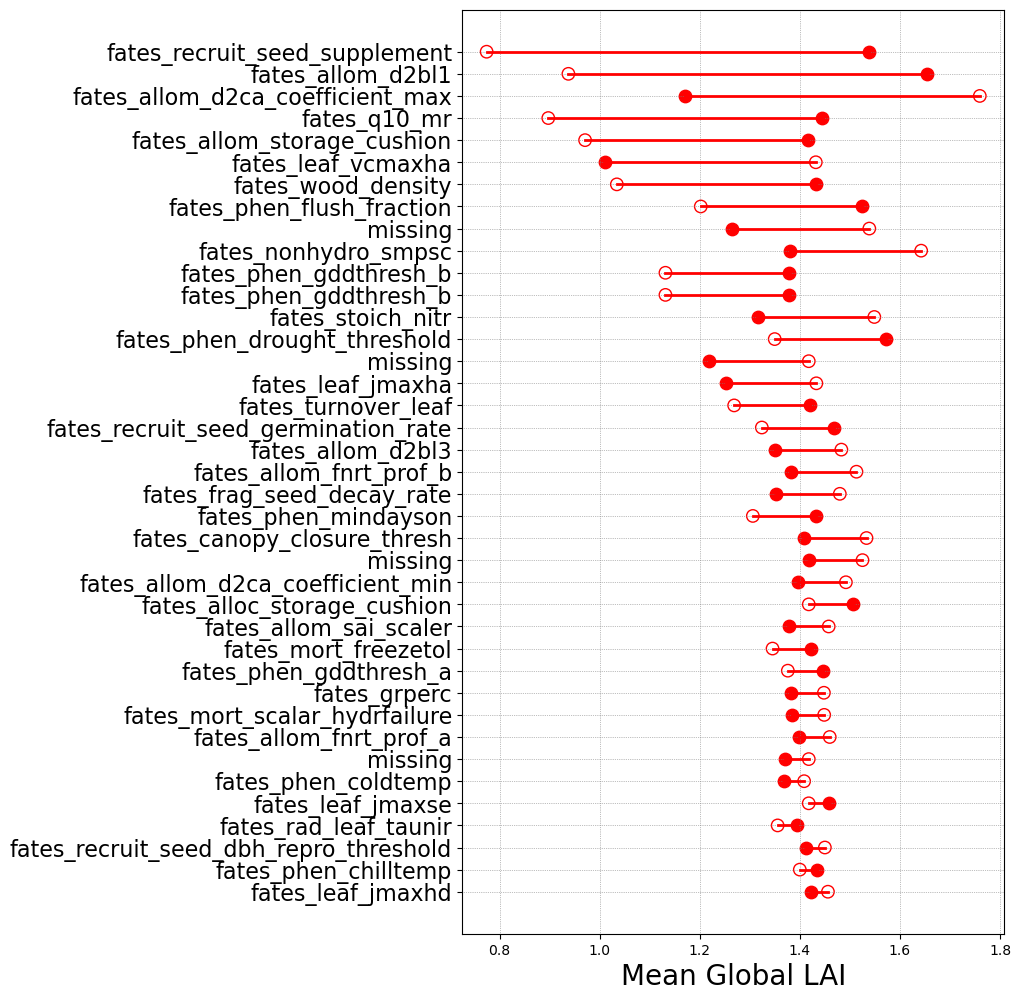

In [12]:
fig = plt.figure()
plt.rcParams['figure.figsize'] =[12,16];
p=0
nshow=40
ncases=125
parray=['']*(nshow+1)
for key in sorted_dict_lai:
    p=p+1
    minl=sorted_dict_lai[key]['minv'].values
    maxl=sorted_dict_lai[key]['maxv'].values
    if(p < nshow):
        parray[nshow-p]=sorted_dict_lai[key]['param_name'] 
        plt.plot([minl, maxl], [nshow-p, nshow-p], color='r',linewidth=2)  # Plot parallel horizontal lines
        plt.scatter(minl, nshow-p, color='r',s=80,facecolors='none')  # Plot the points   
        plt.scatter(maxl, nshow-p, color='r',s=80)  # Plot the points 
        print('p',sorted_dict_lai[key]['pindex'],parray[p])
plt.yticks(range(1, nshow), parray[1:nshow],fontsize=16)  # Set y-axis labels to custom strings
plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
plt.xlabel('Mean Global LAI',fontsize=20)

plt.gcf().set_size_inches(7, 12)
plt.savefig(figpath+'ranked_parameter_impacts_lai_y'+str(ychoose)+'.png',bbox_inches='tight')  
plt.show()
for key in sorted_dict_lai:
    p=p+1
    minl=sorted_dict_lai[key]['minv'].values

p 67 
p 120 
p 56 
p 88 
p 89 
p 35 
p 115 
p 114 
p 116 
p 58 
p 94 
p 19 
p 51 
p 57 
p 26 
p 10 
p 95 
p 98 fates_phen_mindayson
p 73 fates_allom_d2ca_coefficient_max
p 16 fates_allom_fnrt_prof_b
p 59 fates_leaf_jmaxhd
p 93 fates_nonhydro_smpsc
p 25 fates_allom_sai_scaler
p 111 fates_phen_drought_threshold
p 84 fates_leaf_jmaxse
p 14 fates_grperc
p 68 fates_recruit_seed_supplement
p 103 missing
p 91 fates_stoich_nitr
p 9 fates_phen_gddthresh_b
p 69 fates_phen_gddthresh_b
p 13 fates_leaf_jmaxha
p 104 fates_q10_mr
p 29 fates_leaf_vcmaxha


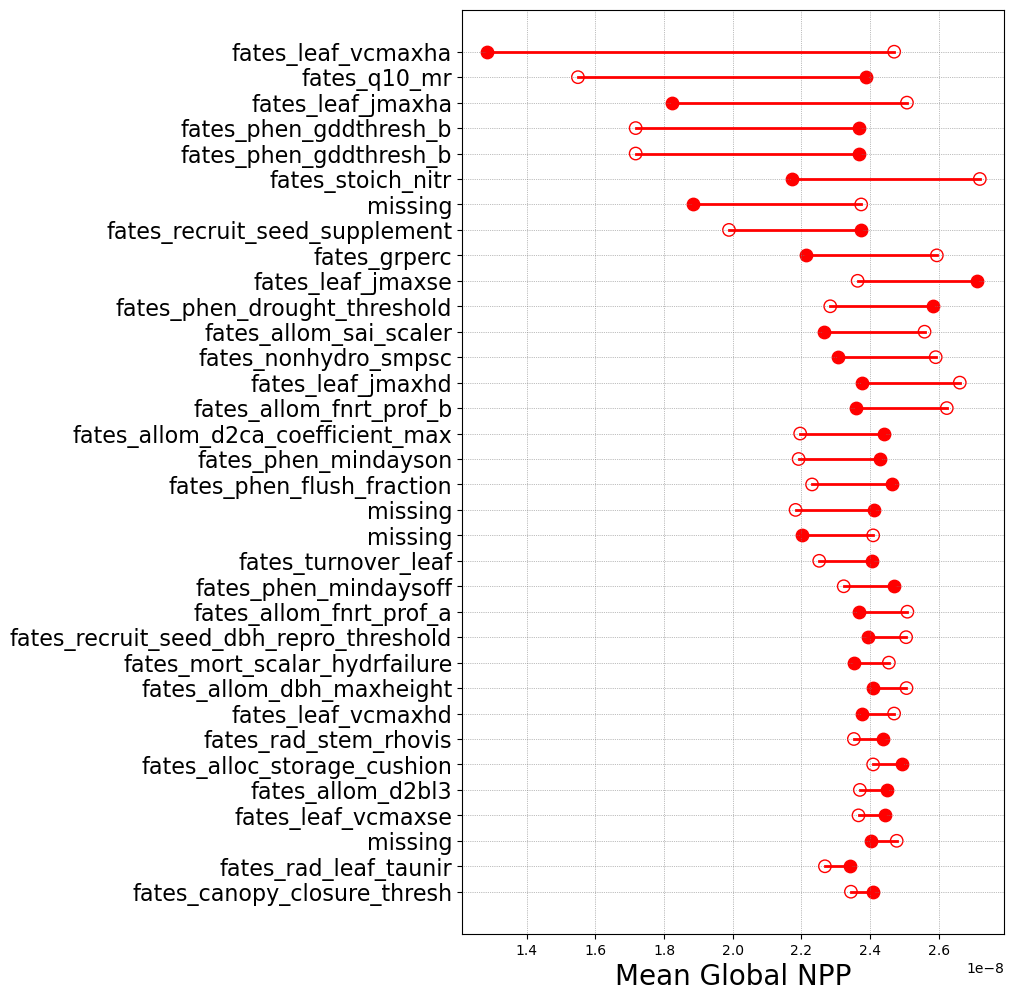

In [16]:
fig = plt.figure()
plt.rcParams['figure.figsize'] =[12,12];
p=0
nshow=35
ncases=125
parray=['']*(nshow+1)
for key in sorted_dict_npp:
    p=p+1
    minl=sorted_dict_npp[key]['minv'].values
    maxl=sorted_dict_npp[key]['maxv'].values
    if(p < nshow):
        parray[nshow-p]=sorted_dict_npp[key]['param_name'] 
        plt.plot([minl, maxl], [nshow-p, nshow-p], color='r',linewidth=2)  # Plot parallel horizontal lines
        plt.scatter(minl, nshow-p, color='r',s=80,facecolors='none')  # Plot the points   
        plt.scatter(maxl, nshow-p, color='r',s=80)  # Plot the points 
        print('p',sorted_dict_npp[key]['pindex'],parray[p])
plt.yticks(range(1, nshow), parray[1:nshow],fontsize=16)  # Set y-axis labels to custom strings
plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
plt.xlabel('Mean Global NPP',fontsize=20)

plt.gcf().set_size_inches(7, 12)
plt.savefig(figpath+'ranked_parameter_impacts_npp_y'+str(ychoose)+'.png',bbox_inches='tight')  
plt.show()


p 0 
p 35 
p 115 
p 67 
p 120 
p 114 
p 56 
p 4 
p 14 
p 69 
p 16 
p 65 
p 116 
p 2 
p 3 
p 12 fates_allom_d2h1
p 7 fates_allom_agb2
p 57 fates_allom_agb1
p 74 fates_grperc
p 18 fates_alloc_store_priority_frac
p 68 missing
p 59 fates_leaf_vcmaxse
p 27 fates_allom_dbh_maxheight
p 19 fates_allom_agb3
p 73 fates_leaf_jmaxha
p 123 fates_recruit_seed_supplement
p 26 fates_q10_mr
p 90 fates_leaf_vcmaxha
p 11 missing
p 98 fates_stoich_nitr
p 5 fates_allom_storage_cushion


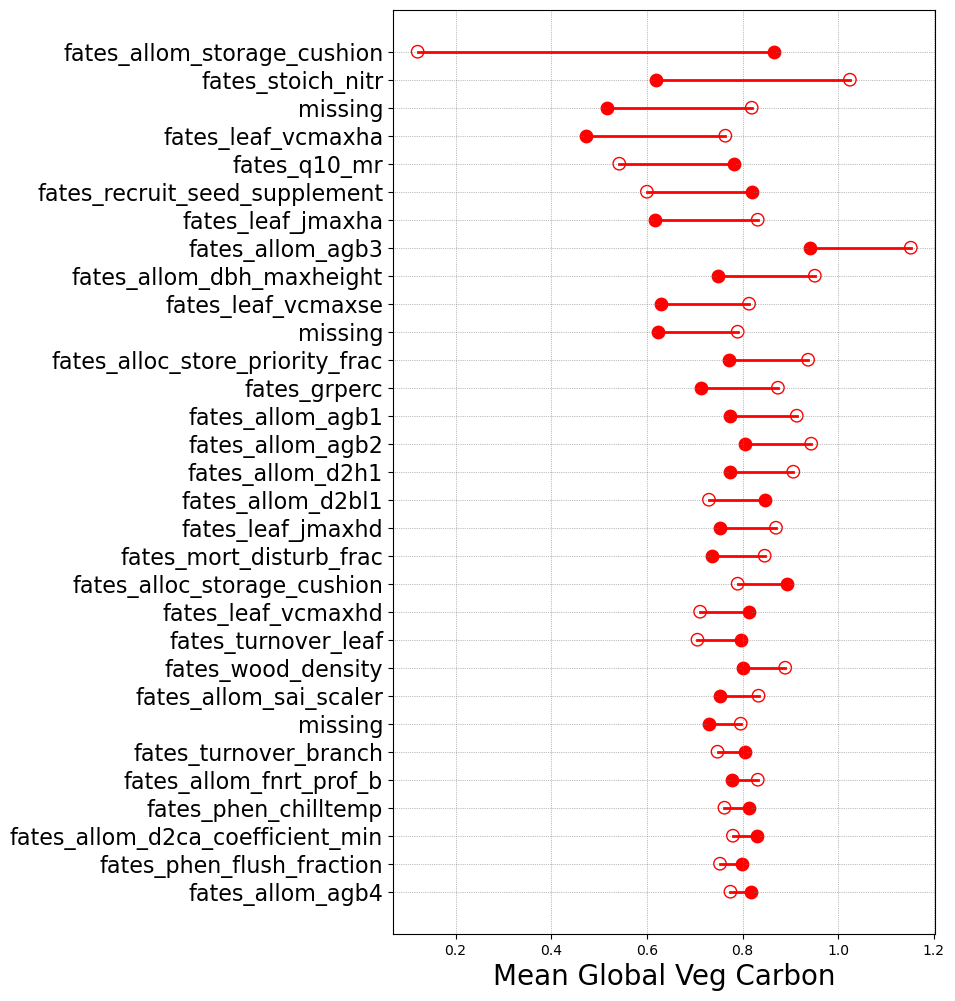

In [17]:
fig = plt.figure()
plt.rcParams['figure.figsize'] =[12,12];
p=0
nshow=32
ncases=125
parray=['']*(nshow+1)
for key in sorted_dict_vegc:
    p=p+1
    minl=sorted_dict_vegc[key]['minv'].values
    maxl=sorted_dict_vegc[key]['maxv'].values
    if(p < nshow):
        parray[nshow-p]=sorted_dict_npp[key]['param_name'] 
        plt.plot([minl, maxl], [nshow-p, nshow-p], color='r',linewidth=2)  # Plot parallel horizontal lines
        plt.scatter(minl, nshow-p, color='r',s=80,facecolors='none')  # Plot the points   
        plt.scatter(maxl, nshow-p, color='r',s=80)  # Plot the points 
        print('p',sorted_dict_vegc[key]['pindex'],parray[p])
plt.yticks(range(1, nshow), parray[1:nshow],fontsize=16)  # Set y-axis labels to custom strings
plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
plt.xlabel('Mean Global Veg Carbon',fontsize=20)

plt.gcf().set_size_inches(7, 12)
plt.savefig(figpath+'ranked_parameter_impacts_vegc_y'+str(ychoose)+'.png',bbox_inches='tight')  
plt.show()


In [ ]:
p=0
for key in sorted_dict_lai:
    p=p+1
    minl=sorted_dict_lai[key]['minv'].values
    maxl=sorted_dict_lai[key]['maxv'].values
    par=sorted_dict_lai[key]['param_name']
    eff=sorted_dict_lai[key]['peffect'].values
    print(p,minl,maxl,par,eff)

## import matplotlib.pyplot as plt
import numpy as np

# Sample data
xmin = np.array([-0.3,-0.4,-0.2, -0.05, -0.7])
xmax = np.array([0.3,0.4,0.2, 0.05, 0.7])
y = np.array([1,125])

# Plotting the pairs of values joined by parallel horizontal lines
for i in range(len(x)):
    plt.plot([x[i], x[i]*-1], [y[i], y[i]], color='b')  # Plot parallel horizontal lines

plt.scatter(xmin, y, color='r')  # Plot the points
plt.scatter(xmax, y, color='r')  # Plot the points

plt.show()

In [ ]:
e1=(dsc['TLAI'].isel(ens=103))
e2=(dsc['TLAI'].isel(ens=104))
diff=e2-e1
diff.plot(vmin=-0.2,vmax=0.2,cmap='RdYlBu')

In [ ]:
print(dsc['TLAI'])
tl=dsc['TLAI'].isel(ens=124*2)
tlsl=tl.sel(lat=slice(-80,80))
tlsl=tlsl.sel(lon=slice(250,350))
tl.plot(vmin=0,vmax=5,cmap='gist_rainbow')
#e1.isel(lon<50) #.plot(vmin=0,vmax=5,cmap='gist_rainbow')

In [ ]:
mean_tlai = dsc['TLAI'].mean(dim=['lat', 'lon'])
x=range(len(mean_tlai))
mean_tlai.plot()
plt.plot(mean_tlai,marker='o',linestyle='-')

In [ ]:
print(mean_tlai[228:230].values)

In [ ]:
print(mean_tlai[1:4].values)

In [ ]:
mean_npp = dsc['FATES_NPP'].mean(dim=['lat', 'lon'])
x=range(len(mean_npp))
mean_npp.plot()
plt.plot(mean_npp,marker='o',linestyle='-')

In [ ]:
mean_npp = dsc['TLAI'].mean(dim=['lat', 'lon'])
x=range(len(mean_npp))
mean_npp.plot()
plt.plot(mean_npp,marker='o',linestyle='-')

In [ ]:
sum_nindiv = dsc['FATES_NPLANT_PF'].sum(dim=['fates_levpft'])
mean_nindiv = sum_nindiv.mean(dim=['lat', 'lon'])

x=range(len(mean_nindiv))
plt.plot(mean_nindiv,marker='o',linestyle='-')

In [ ]:
print(mean_tlai[118:124].values)

In [ ]:
plt.scatter(mean_nindiv,mean_tlai)

In [ ]:
cue = np.divide(dsc['FATES_NPP'],dsc['FATES_GPP'])
cue.isel(ens=103).plot(vmin=0.3, vmax=0.7,cmap='gist_rainbow')
#mean_cue = cue.mean(dim=['lat', 'lon'])
#mean_cue.plot()
#|plt.plot(mean_cue,marker='o',linestyle='-')
###x=range(len(mean_cue))


In [ ]:
dsc['TLAI'].isel(ens=103).plot(cmap='gist_rainbow')

In [ ]:
dsc['TLAI'].isel(ens=228).plot(cmap='gist_rainbow')

In [ ]:
lai1=dsc['TLAI'].isel(ens=1)
npp1=dsc['FATES_NPP'].isel(ens=1)
plt.scatter(lai1,npp1)
plt.savefig('npplai1_16.png')  
plt.show()
plt.tight_layout()

# Read in parameter files. 

In [ ]:
df = pd.read_csv('NOCOMP_PPE_parameters.csv')

####  ANALYSIS: Save data in netcdf file just incase

####  ANALYSIS:  Make a function to plot relative differences between runs

In [ ]:
def make_diff_figure(dsc,v,vmode,rel,conv,ncases,pmode,vlim,parameter_list):   
    fig = plt.figure()
    tots=np.zeros([ncases+1])
    if(pmode == 1):
        plt.rcParams['figure.figsize'] =[14,7];
    if(pmode == 2):
        plt.rcParams['figure.figsize'] = [14,2];
    if(pmode == 3):
        plt.rcParams['figure.figsize'] = [12,10]

    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    ncol=(ncases+1) // nrw
    count=0
    defe= 0
    
    if(n==13): defe = 12
    if(n==26): defe = 3
    if(n>=32): defe = 3
    if(n>=35):  defe = 0
    if(vmode == 1): #only one variable
        
        var_0=dsc[vars[v]].isel(ens=defe)
        defm=np.multiply(np.mean(var_0,0),conv)
    else: #vmode = 2, ratio
        var_i=dsc[vars[v[0]]].isel(ens=defe) 
        vari=np.multiply(np.mean(var_i,0),conv[0])
        var_ib=dsc[vars[v[1]]].isel(ens=defe)
        varib=np.multiply(np.mean(var_ib,0),conv[1]) 
        defm=np.divide(vari,varib)
            
    for i in vs:
        # organize plots depending on whether this is a OAAT or ensemble analysis 
        index=((count+1) % nrw)*ncol + ((count+1) // nrw)
        p=((count+1) // nrw)-1
        enspick=i
        if(zerocase == 0):
            index = i # miss out the zero case in the ensemble indexing.
            enspick = i-1 # the ensembles are zero indexed.
        #print('i',i,'index',index)
        #print('vs',vs)
        if( vmode == 1): #only one variable
            var_i=dsc[vars[v]].isel(ens=enspick) 
            mod=np.multiply(np.mean(var_i,0),conv)
            delt=mod-defm
        else:
            var_i=dsc[vars[v[0]]].isel(ens=enspick) 
            vari=np.multiply(np.mean(var_i,0),conv[0])
            var_ib=dsc[vars[v[1]]].isel(ens=enspick)
            varib=np.multiply(np.mean(var_ib,0),conv[1])                    
            mod=np.divide(vari,varib)
        if(rel==1): delt=np.divide(mod-defm,defm)
        if(rel==2): delt =mod-defm
        if(rel==0): delt=mod
                  
        dtot=(np.nansum(np.nansum(delt,0),0))
        tots[i]=dtot
        if(pmode == 1):
            if((i+1) % 2==0):
                if(vary_by_pft==0):
                    ex=' x'+str(max_delta[p])
                else:
                    ex=' max'
            else:
                if(vary_by_pft==0):
                    ex=' x'+str(min_delta[p])
                else:
                    ex=' min'
                    
        if(pmode == 2):
            ex = ' x'+str(pvalue[i-1])
        
        if(pmode == 3):
            ex0 = ' ='+str(pvalue1[i-1])
            ex1 = ' ='+str(pvalue2[i-1])
        
        if(missing[i]==1):
            print('missing plot',i)
            
        else:         
            #axis ranges.

            cm = 'RdYlBu'
            if(rel==1): vm = -vlim
            if(rel==2): vm = -vlim #vm=vlim*0.5
            if(rel==0): vm = 0 ; cm = 'rainbow' #np.min(np.min(delt,0),0)
            
            #print('vm',vm)
            donotplot=0
            if(rel==1 or rel ==2):
                if(pmode == 1 and i == 0 ):donotplot=1
            #print('donotplot',donotplot,i)
            if(donotplot==0):
                ax = fig.add_subplot(nrw, ncol, index)
                plt1 = delt.plot(cmap=cm,vmin=vm,vmax=vlim)
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                if pmode == 1 : ax.set_title(str(parameter_label[(((count+1) // 2))-1]+ex))
                if pmode == 2 : ax.set_title(str(parameter_label[0]+ex))
                if pmode == 3 : ax.set_title(parameter_label[0]+str(ex0)+' '+parameter_label[1]+str(ex1))
               # cbar = plt.colorbar(plt1)
                if(vmode==1):
                    ylab=vars[v]
                else:
                    ylab=vars[v[0]]+'/'+vars[v[1]]
                plt1.colorbar.ax.set_ylabel(ylab)
                fig.canvas.draw()
        count=count+1
        
       # time.sleep(1) 
            
    plt.tight_layout()    
    if(rel==0): ptype='_abs_'
    if(rel==1): ptype='_reldiff_'
    if(rel==2): ptype='_absdiff_'
    
    if(vmode == 1): 
        figname = figpath+ens_directory+vars[v]+ptype+'_'+str(ychoose)+'.png'
    else:
        figname = figpath+ens_directory+vars[v[0]]+'_div_'+vars[v[1]]+ptype+'_'+str(ychoose)+'.png'            
    print(figname)
    plt.savefig(figname)
    #ttot=np.reshape(tots, [5,5])
    #print(ttot)
    #fig = plt.figure()
   # plt.imshow(ttot)       

### ANALYSIS: Plot model ensemble output

In [ ]:
#print(dsc)

In [ ]:
# types of plot
abs=0
rel=1
absdiff=2
gppconv=3600*24*365

In [ ]:
conv=1;vlim=5.5;vmode=1;
print(vars)
if doanalysisplots ==1:
    make_diff_figure(dsc,2,vmode,abs,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=1;vlim=0.5;vmode=1;
if doanalysisplots ==1:
    make_diff_figure(dsc,2,vmode,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.8;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[1,0],vmode,abs,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.1;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[1,0],vmode,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.8;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[5,0],vmode,abs,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.1;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[5,0],vmode,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.8;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[4,0],vmode,abs,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=[1,1];vlim=0.1;vmode=2;
if doanalysisplots ==1:
    make_diff_figure(dsc,[4,0],vmode,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
vlim=3.5;vmode=1;
if doanalysisplots ==1:
    make_diff_figure(dsc,0,vmode,abs,gppconv,ncases,pmode,vlim,parameter_list)

In [ ]:
vlim=0.3;
if doanalysisplots ==1:
    make_diff_figure(dsc,0,1,absdiff,gppconv,ncases,pmode,vlim,parameter_list)

In [ ]:
vlim=1.5;vmode=1;
if doanalysisplots ==1:
    make_diff_figure(dsc,1,vmode,abs,gppconv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=3600*24*365;vlim=0.3
if doanalysisplots ==1:
    make_diff_figure(dsc,1,1,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
vlim=0.1;vmode=1;
if doanalysisplots ==1:
    make_diff_figure(dsc,1,vmode,absdiff,gppconv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=1;vlim=15;
if doanalysisplots ==1:
    make_diff_figure(dsc,7,1,abs,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=1;vlim=2
if doanalysisplots ==1:
    make_diff_figure(dsc,7,1,rel,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=1;vlim=1
if doanalysisplots ==1:
    make_diff_figure(dsc,7,1,absdiff,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
conv=1;vlim=5.5
if doanalysisplots ==1:
    make_diff_figure(dsc,2,1,0,conv,ncases,pmode,vlim,parameter_list)

In [ ]:
pfile1='/glade/work/rfisher/FATES_calibration/FATES_NOCOMP_OAAT/paramfiles/ nocomp_oaat_v1_9.nc'
pfile2='/glade/work/rfisher/FATES_calibration/FATES_NOCOMP_OAAT/paramfiles/ nocomp_oaat_v1_250.nc'
